<a href="https://colab.research.google.com/github/GayatriPriyaGoli/Sentiment-analysis-on-amazon-reviews/blob/main/FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import pandas as pd
file_path = '/content/drive/MyDrive/Amazon_Unlocked_Mobile.csv'
df = pd.read_csv(file_path)
df.head()



,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [7]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB
None
               Price         Rating   Review Votes
count  407907.000000  413840.000000  401544.000000
mean      226.867155       3.819578       1.507237
std       273.006259       1.548216       9.163853
min         1.730000       1.000000       0.000000
25%        79.990000       3.000000       0.000000
50%       144.710000       5.000000       0.000000
75%       269.990000       5.000000       1.000000
max      2598.000000       5.000000     645.000000


In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from scipy import stats

# Load the dataset
file_path = '/content/drive/MyDrive/Amazon_Unlocked_Mobile.csv'
df = pd.read_csv(file_path)

# 1. Remove duplicates
df = df.drop_duplicates()

# 2. Handle missing values
# Fill missing 'Price' and 'Review Votes' with median
df['Price'] = df['Price'].fillna(df['Price'].median())
df['Review Votes'] = df['Review Votes'].fillna(df['Review Votes'].median())

# Fill missing 'Brand Name' with 'Unknown'
df['Brand Name'] = df['Brand Name'].fillna('Unknown')

# 3. Handle text normalization for 'Reviews'
# Lowercase, remove special characters and digits
df['Cleaned_Reviews'] = df['Reviews'].astype(str).str.lower()
df['Cleaned_Reviews'] = df['Cleaned_Reviews'].str.replace(r'[^a-z\s]', '', regex=True)
df['Cleaned_Reviews'] = df['Cleaned_Reviews'].str.strip()

# 4. Outlier detection and removal
# Remove outliers using z-scores for 'Price' and 'Review Votes'
z_scores = np.abs(stats.zscore(df[['Price', 'Review Votes']]))
df = df[(z_scores < 3).all(axis=1)]

# 5. Encoding 'Brand Name' using label encoding
df['Brand_Name_Encoded'] = df['Brand Name'].astype('category').cat.codes

# 6. KNN Imputation (for a more advanced imputation)
# Assuming missing values for 'Price' and 'Review Votes' were handled by median, but we can apply KNN imputation
# for demonstration purposes here
knn_imputer = KNNImputer(n_neighbors=5)
df[['Price', 'Review Votes']] = knn_imputer.fit_transform(df[['Price', 'Review Votes']])

# 7. Drop unnecessary columns
df = df.drop(columns=['Product Name'])

# Save the cleaned dataset
df.to_csv('/content/drive/MyDrive/Amazon_Unlocked_Mobile_cleaned_full.csv', index=False)

print("Data cleaning complete and saved.")


<ipython-input-8-66aed3fbeb19>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].fillna(df['Price'].median())
<ipython-input-8-66aed3fbeb19>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Votes'] = df['Review Votes'].fillna(df['Review Votes'].median())
<ipython-input-8-66aed3fbeb19>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

Data cleaning complete and saved.


In [9]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import download

# Download NLTK resources
download('punkt')
download('stopwords')
download('wordnet')

# Load the dataset
file_path = '/content/drive/MyDrive/Amazon_Unlocked_Mobile_cleaned_full.csv'
df = pd.read_csv(file_path)

# Initialize NLP tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Function for text cleaning
def clean_review(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove special characters, numerals, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words and short words
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # Apply stemming and lemmatization
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens]

    # Join the cleaned tokens back into a single string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply the cleaning function to the 'Cleaned_Reviews' column
df['Processed_Reviews'] = df['Cleaned_Reviews'].apply(lambda x: clean_review(str(x)))

# Save the cleaned reviews to a new CSV file
df.to_csv('/content/drive/MyDrive/Amazon_Unlocked_Mobile_processed_reviews.csv', index=False)

print("Review cleaning complete and saved.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Review cleaning complete and saved.


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your cleaned dataset
file_path = '/content/drive/MyDrive/Amazon_Unlocked_Mobile_cleaned_reviews.csv'
df = pd.read_csv(file_path)

# Display the columns to check if 'Cleaned_Reviews' exists
print("Available columns in the DataFrame:")
print(df.columns)

# Check for missing values in the 'Cleaned_Reviews' column and fill them with an empty string
df['Cleaned_Reviews'] = df['Cleaned_Reviews'].fillna('')

# Initialize the TF-IDF Vectorizer with a lower max_features to reduce memory load
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Extract features from the cleaned reviews in a try-except block to catch potential issues
try:
    # Extract features
    X_tfidf = tfidf.fit_transform(df['Cleaned_Reviews'])

    # Get feature names (optional)
    feature_names = tfidf.get_feature_names_out()

    # Display the shape of the TF-IDF matrix
    print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")

    # Convert to DataFrame for easier inspection, if memory allows
    tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

    # Display the first few rows of the TF-IDF DataFrame
    print(tfidf_df.head())
except Exception as e:
    print(f"An error occurred: {e}")


Available columns in the DataFrame:
Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes', 'Cleaned_Reviews', 'Sentiment'],
      dtype='object')
TF-IDF Matrix Shape: (413840, 5000)
   abilities  ability  able  abroad  absolute  absolutely  abuse   ac  accept  \
0        0.0      0.0   0.0     0.0       0.0         0.0    0.0  0.0     0.0   
1        0.0      0.0   0.0     0.0       0.0         0.0    0.0  0.0     0.0   
2        0.0      0.0   0.0     0.0       0.0         0.0    0.0  0.0     0.0   
3        0.0      0.0   0.0     0.0       0.0         0.0    0.0  0.0     0.0   
4        0.0      0.0   0.0     0.0       0.0         0.0    0.0  0.0     0.0   

   acceptable  ...  yrs   zc  zen  zenfone  zero  zone  zoom  zooming  zte  \
0         0.0  ...  0.0  0.0  0.0      0.0   0.0   0.0   0.0      0.0  0.0   
1         0.0  ...  0.0  0.0  0.0      0.0   0.0   0.0   0.0      0.0  0.0   
2         0.0  ...  0.0  0.0  0.0      0.0   0.0   0.0   0.0  

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy import sparse

# Load your cleaned dataset
file_path = '/content/drive/MyDrive/Amazon_Unlocked_Mobile_cleaned_reviews.csv'
df = pd.read_csv(file_path)

# Check for missing values in the 'Cleaned_Reviews' column and fill them with an empty string
df['Cleaned_Reviews'] = df['Cleaned_Reviews'].fillna('')

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Extract features from the cleaned reviews
X_tfidf = tfidf.fit_transform(df['Cleaned_Reviews'])

# Assuming 'Sentiment' is your target variable
y = df['Sentiment']  # Make sure this column exists in your DataFrame

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

# Save the extracted features and labels for later use (sparse matrix)
sparse.save_npz('/content/drive/MyDrive/X_train_tfidf.npz', X_train)
sparse.save_npz('/content/drive/MyDrive/X_test_tfidf.npz', X_test)

# Optionally save the labels
y_train.to_csv('/content/drive/MyDrive/y_train.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/y_test.csv', index=False)
import pandas as pd

# Load your cleaned dataset
file_path = '/content/drive/MyDrive/Amazon_Unlocked_Mobile_cleaned_reviews.csv'
df = pd.read_csv(file_path)

# Check if 'Rating' and 'Cleaned_Reviews' exist
print(df.columns)

# Define sentiment based on the Rating column
def assign_sentiment(rating):
    if rating == 4 or rating == 5:
        return 'positive'
    elif rating == 1 or rating == 2:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create a 'Sentiment' column
df['Sentiment'] = df['Rating'].apply(assign_sentiment)

# Filter out neutral reviews (where sentiment is 'neutral')
df = df[df['Sentiment'] != 'neutral']

# Reset index after filtering
df = df.reset_index(drop=True)

# Check the distribution of the sentiments
print(df['Sentiment'].value_counts())

# Proceed with the rest of the feature extraction and modeling code
# You can now use df['Sentiment'] as the target for classification


Training set shape: (331072, 5000), Test set shape: (82768, 5000)
Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes', 'Cleaned_Reviews', 'Sentiment'],
      dtype='object')
Sentiment
positive    284997
negative     97078
Name: count, dtype: int64


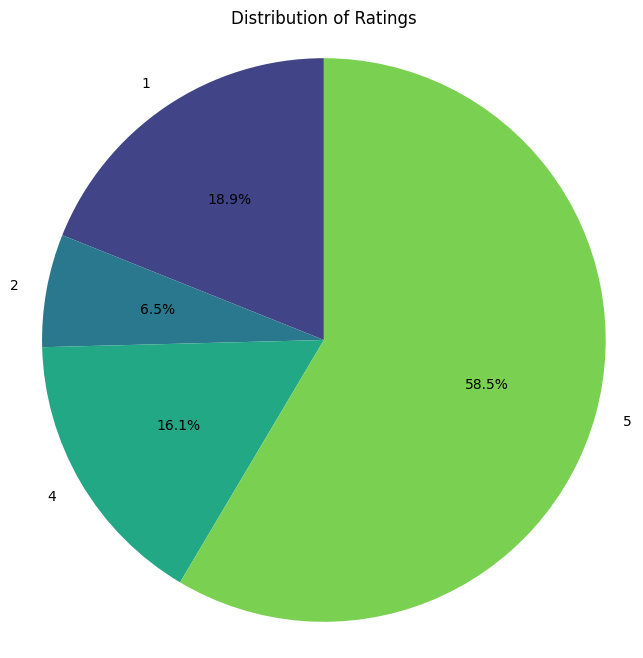

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already preprocessed and contains a 'Rating' column

# Count the number of reviews for each rating
rating_counts = df['Rating'].value_counts().sort_index()  # Sort ratings from 1 to 5

# Create a pie chart to show the distribution of ratings
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(rating_counts)))
plt.title('Distribution of Ratings')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Ensure missing values in 'Cleaned_Reviews' are handled
df['Cleaned_Reviews'] = df['Cleaned_Reviews'].fillna('')

# Extract features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf.fit_transform(df['Cleaned_Reviews'])

# Define the target variable (Sentiment)
y = df['Sentiment']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 93.49%

Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.85      0.87     19392
    positive       0.95      0.96      0.96     57023

    accuracy                           0.93     76415
   macro avg       0.92      0.91      0.91     76415
weighted avg       0.93      0.93      0.93     76415



In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Reduce max features for the TF-IDF
tfidf = TfidfVectorizer(max_features=2000, stop_words='english')
df['Cleaned_Reviews'] = df['Cleaned_Reviews'].fillna('')
# Transform the reviews to a TF-IDF matrix
X_tfidf = tfidf.fit_transform(df['Cleaned_Reviews'])

# Assuming 'Sentiment' is your target variable
y = df['Sentiment']  # Make sure this column exists in your DataFrame

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model with a sample of the data (optional)
sample_size = 10000  # Adjust this based on your dataset size
X_train_sample, y_train_sample = X_train[:sample_size], y_train[:sample_size]

# Fit the model on the sample
svm_model.fit(X_train_sample, y_train_sample)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 90.79%

SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.77      0.81     19392
    positive       0.92      0.96      0.94     57023

    accuracy                           0.91     76415
   macro avg       0.89      0.86      0.87     76415
weighted avg       0.91      0.91      0.91     76415



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Train the Naive Bayes model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model's performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 90.15%

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.71      0.78     19392
    positive       0.91      0.97      0.94     57023

    accuracy                           0.90     76415
   macro avg       0.89      0.84      0.86     76415
weighted avg       0.90      0.90      0.90     76415



In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import SGDClassifier  # Using faster SGDClassifier
from sklearn.metrics import classification_report, accuracy_score

# Use faster SGDClassifier instead of LinearSVC
svm_model = SGDClassifier(loss='hinge', random_state=42)  # Faster linear SVM using SGD
rf_model = RandomForestClassifier(n_estimators=30, random_state=42)  # Reduced estimators for speed

# Create a voting classifier
ensemble_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('rf', rf_model)
], voting='hard')  # Hard voting for faster execution

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the performance
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Classifier Accuracy: {accuracy_ensemble * 100:.2f}%")
print("\nEnsemble Classifier Classification Report:")
print(classification_report(y_test, y_pred_ensemble))


Ensemble Classifier Accuracy: 95.10%

Ensemble Classifier Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.94      0.91     19392
    positive       0.98      0.96      0.97     57023

    accuracy                           0.95     76415
   macro avg       0.93      0.95      0.94     76415
weighted avg       0.95      0.95      0.95     76415



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model's performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 95.22%

Decision Tree Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.90      0.91     19392
    positive       0.97      0.97      0.97     57023

    accuracy                           0.95     76415
   macro avg       0.94      0.93      0.94     76415
weighted avg       0.95      0.95      0.95     76415



In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Bernoulli Naive Bayes classifier
bernoulli_nb_model = BernoulliNB()

# Train the Bernoulli Naive Bayes model
bernoulli_nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = bernoulli_nb_model.predict(X_test)

# Evaluate the model's performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Bernoulli Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")
print("\nBernoulli Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))



Bernoulli Naive Bayes Accuracy: 84.73%

Bernoulli Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.62      0.67     19392
    positive       0.88      0.93      0.90     57023

    accuracy                           0.85     76415
   macro avg       0.81      0.77      0.79     76415
weighted avg       0.84      0.85      0.84     76415



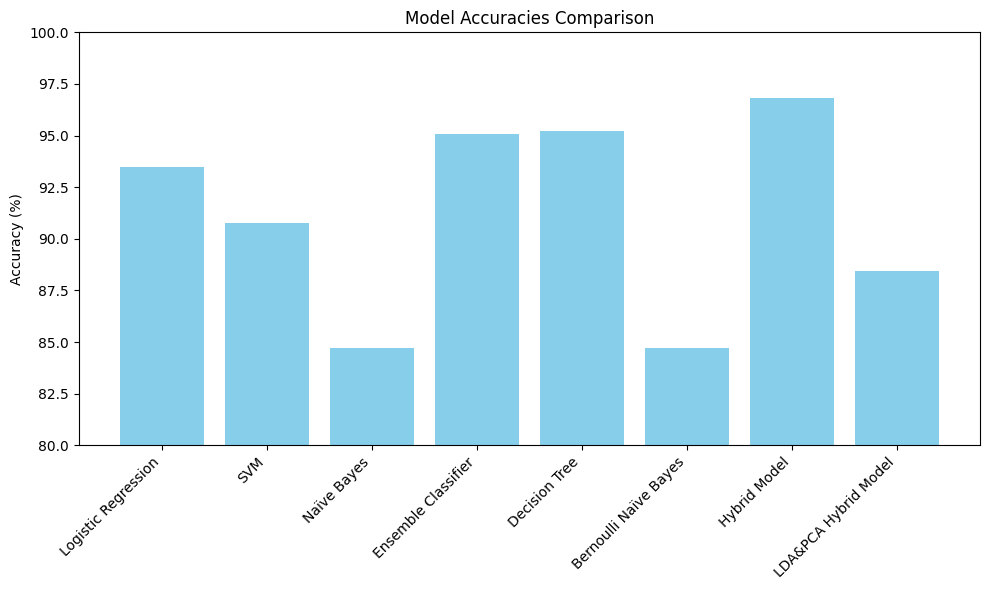

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming these are the accuracy values as percentages already
accuracy_logistic = 93.49
accuracy_svm = 90.79
accuracy_nb = 84.73
accuracy_ensemble = 95.10
accuracy_tree = 95.22
accuracy_bernoulli_nb = 84.73
accuracy_hybrid=96.81
accuracy_hybrid2 = 88.45

# Accuracies of the models (values are already percentages)
accuracies = {
    'Logistic Regression': accuracy_logistic,
    'SVM': accuracy_svm,
    'Naïve Bayes': accuracy_nb,
    'Ensemble Classifier': accuracy_ensemble,
    'Decision Tree': accuracy_tree,
    'Bernoulli Naïve Bayes': accuracy_bernoulli_nb,
    'Hybrid Model': accuracy_hybrid,
    'LDA&PCA Hybrid Model':accuracy_hybrid2
}

# Plotting
plt.figure(figsize=(10, 6))

# Create an array for x-axis positions
models = list(accuracies.keys())
x_pos = np.arange(len(models))

# Create the bar chart
plt.bar(x_pos, accuracies.values(), color='skyblue', align='center')

# Set x-axis labels and rotate them for better readability
plt.xticks(x_pos, models, rotation=45, ha='right')

# Set the y-axis label and chart title
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies Comparison')

# Set y-axis limits for percentages (assuming accuracies range from 0 to 100)
plt.ylim(80, 100)

# Optional: line for 50% accuracy
plt.axhline(y=50, color='r', linestyle='--')

# Adjust layout to prevent clipping of x-axis labels
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define base models for hybrid approach
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),  # Random Forest
    ('sgd', SGDClassifier(loss='hinge', random_state=42))  # Linear SVM using SGD
]

# Define the final estimator (meta-model)
final_estimator = LogisticRegression()

# Create the stacking classifier (hybrid model)
hybrid_model = StackingClassifier(estimators=base_models, final_estimator=final_estimator)

# Train the hybrid model
hybrid_model.fit(X_train, y_train)

# Predict on the test set
y_pred_hybrid = hybrid_model.predict(X_test)

# Evaluate the hybrid model
accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)
print(f"Hybrid Model Accuracy: {accuracy_hybrid * 100:.2f}%")
print("\nHybrid Model Classification Report:")
print(classification_report(y_test, y_pred_hybrid))


Hybrid Model Accuracy: 96.81%

Hybrid Model Classification Report:
              precision    recall  f1-score   support

    negative       0.95      0.92      0.94     19392
    positive       0.97      0.98      0.98     57023

    accuracy                           0.97     76415
   macro avg       0.96      0.95      0.96     76415
weighted avg       0.97      0.97      0.97     76415



In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your cleaned dataset
file_path = '/content/drive/MyDrive/Amazon_Unlocked_Mobile_cleaned_reviews.csv'
df = pd.read_csv(file_path)

# Check for missing values in the 'Cleaned_Reviews' column and fill them with an empty string
df['Cleaned_Reviews'] = df['Cleaned_Reviews'].fillna('')

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')  # Reduce features

# Extract features from the cleaned reviews
X_tfidf = tfidf.fit_transform(df['Cleaned_Reviews'])
y = df['Sentiment']  # Assuming 'Sentiment' is your target variable

# Use a subset of the data for faster testing (20% of the data)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.8, random_state=42)

# Apply PCA
pca = PCA(n_components=10)  # Reduce number of components
X_train_pca = pca.fit_transform(X_train.toarray())
X_test_pca = pca.transform(X_test.toarray())

# Apply LDA
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train.toarray(), y_train)
X_test_lda = lda.transform(X_test.toarray())

# Concatenate PCA and LDA features
X_train_hybrid = np.hstack((X_train_pca, X_train_lda))
X_test_hybrid = np.hstack((X_test_pca, X_test_lda))

# Define base learners
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)  # Further reduced estimators
svm_model = SVC(kernel='linear', random_state=42, probability=True)

# Create a stacking classifier
stacked_model = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('svm', svm_model)
    ], final_estimator=LogisticRegression(max_iter=100)
)

# Train the hybrid model
stacked_model.fit(X_train_hybrid, y_train)

# Predict and evaluate
y_pred_hybrid = stacked_model.predict(X_test_hybrid)
accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)
print(f"Hybrid Model Accuracy: {accuracy_hybrid * 100:.2f}%")
print("\nHybrid Model Classification Report:")
print(classification_report(y_test, y_pred_hybrid))


Hybrid Model Accuracy: 88.45%

Hybrid Model Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     77862
           1       0.91      0.96      0.94    227744
           2       0.74      0.34      0.46     25466

    accuracy                           0.88    331072
   macro avg       0.82      0.71      0.74    331072
weighted avg       0.88      0.88      0.87    331072



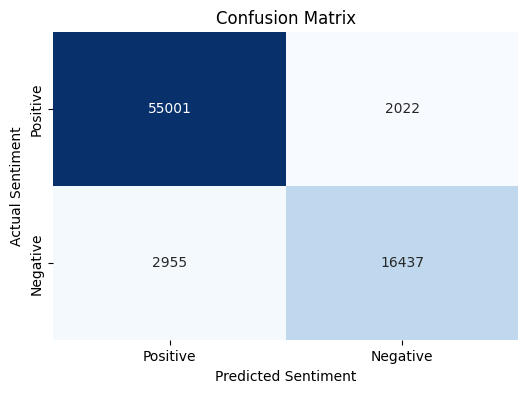

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test contains the true labels and y_pred contains the predicted labels
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])

# Create a dataframe for easier visualization with labels
cm_df = pd.DataFrame(cm, index=['Positive', 'Negative'], columns=['Positive', 'Negative'])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.ylabel('Actual Sentiment')
plt.xlabel('Predicted Sentiment')
plt.show()
